<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 11 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Produisez une étude de marché avec R ou Python (partie analyse)
</h2>
</div>

# Analyse et Clustering des Données d'Exportation de Poulet

## Objectif du Notebook

L'objectif de ce notebook est d'analyser les données d'exportation de poulet à l'aide de techniques statistiques avancées, notamment l'**Analyse en Composantes Principales (ACP)** et le **Clustering**. L'objectif est de réduire la dimensionnalité des données tout en conservant l'essentiel de l'information et de regrouper les pays en fonction de leurs similarités à travers deux méthodes de clustering : **Classification Ascendante Hiérarchique (CAH)** et **K-means**.

Les principales étapes de cette analyse sont les suivantes :
- **Réduction de la dimensionnalité avec l'ACP**.
- **Analyse du cercle des corrélations** et de la projection des individus.
- **Clustering des pays** pour identifier des groupes de pays similaires.
  
## Étapes de l'Analyse

### 1. Préparation des Données
Avant de commencer l'analyse, nous avons préparé les données dans un premier notebook en nettoyant les données, en supprimant les valeurs manquantes et en standardisant les colonnes. Nous avons également vérifié la cohérence des données et avons sauvegardé un fichier CSV (`export_poulet_etude_poule_qui_chante.csv`) pour cette analyse.

### 2. Réduction de la Dimensionnalité avec l'ACP
L'ACP est utilisée pour réduire la dimensionnalité des données tout en capturant la variance maximale. Cette étape nous permet de mieux comprendre les relations entre les différentes variables (quantité de poulet exporté, émissions de gaz à effet de serre, PIB, etc.).

#### Objectifs :
- Visualiser le **cercle des corrélations** pour observer comment les différentes variables sont corrélées.
- Projeter les **individus (pays)** dans l'espace réduit de l'ACP pour mieux visualiser les regroupements naturels.

### 3. Clustering des Pays
Une fois l'ACP réalisée, nous appliquons deux techniques de clustering pour regrouper les pays similaires :
- **Classification Ascendante Hiérarchique (CAH)** : Cette méthode permet de regrouper les pays en fonction de leur similarité à travers un dendrogramme.
- **K-means** : Cette méthode nous permettra de définir un nombre fixe de groupes (clusters) en fonction des données.

#### Objectifs :
- Identifier les groupes de pays qui présentent des caractéristiques similaires.
- Analyser les résultats du clustering pour en tirer des conclusions sur les segments de pays.

### 4. Interprétation des Résultats
Nous analyserons les résultats de l'ACP, le cercle des corrélations, et la projection des individus dans l'espace réduit. Ensuite, nous examinerons les clusters obtenus à partir des méthodes de clustering pour comprendre les caractéristiques des pays regroupés ensemble.

---

In [65]:
# Importation des bibliothèques nécessaires pour l'ACP et le clustering
import pandas as pd  # Pour la gestion des DataFrames
import numpy as np  # Pour les calculs numériques
import matplotlib.pyplot as plt  # Pour les visualisations
import seaborn as sns  # Pour des visualisations avancées

# Analyse en Composantes Principales (ACP)
from sklearn.decomposition import PCA  # Pour l'ACP
from sklearn.preprocessing import StandardScaler  # Pour la normalisation des données

# Clustering
from sklearn.cluster import AgglomerativeClustering  # Pour la classification ascendante hiérarchique (CAH)
from sklearn.cluster import KMeans  # Pour le K-means
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster  # Pour le dendrogramme

# Pour l'évaluation des clusters
from sklearn.metrics import silhouette_score  # Pour mesurer la qualité du clustering

# Pour gérer les warnings (éventuels avertissements lors de l'analyse)
import warnings
warnings.filterwarnings('ignore')


In [66]:
# Chargement des données à partir du fichier CSV
df = pd.read_csv("export_poulet_etude_poule_qui_chante.csv")

# Vérification des premières lignes du DataFrame
df.head()

# Vérification des informations générales sur les colonnes et les types de données
df.info()

# Vérification des valeurs manquantes
df.isna().sum()

# Résumé statistique des données numériques
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Zone                                     130 non-null    object 
 1   Année                                    130 non-null    int64  
 2   Quantité Importations (kg)               130 non-null    float64
 3   Quantité Nourriture (kg)                 130 non-null    float64
 4   Quantité Production (kg)                 130 non-null    float64
 5   Valeur emissions N2O en kilotonnes       130 non-null    float64
 6   Valeur emissions CH4 en kilotonnes       130 non-null    float64
 7   Indice perfo logistique / 5              130 non-null    float64
 8   Quantité poulet Exportations partenaire  130 non-null    float64
 9   Quantité poulet Importations partenaire  130 non-null    float64
 10  $ Exportations partenaire                130 non-n

,Année,Quantité Importations (kg),Quantité Nourriture (kg),Quantité Production (kg),Valeur emissions N2O en kilotonnes,Valeur emissions CH4 en kilotonnes,Indice perfo logistique / 5,Quantité poulet Exportations partenaire,Quantité poulet Importations partenaire,$ Exportations partenaire,$ Importations partenaire,Pib en $ par habitant,Population,Stabilité politique
count,130.0,1.300000e+02,1.300000e+02,1.300000e+02,130.000000,130.000000,130.000000,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,130.000000,1.300000e+02,130.000000
mean,2017.0,8.700000e+07,5.070769e+08,5.541923e+08,1.108444,1.801772,2.869980,5.225231e+05,1.828516e+05,9.716231e+05,1.283675e+05,13968.707916,3.879258e+07,-0.140923
std,0.0,1.794351e+08,1.126144e+09,1.442114e+09,3.794086,6.285600,0.549500,3.615034e+06,2.022086e+06,6.093230e+06,1.169790e+06,19645.323328,1.236016e+08,0.886602
min,2017.0,0.000000e+00,2.000000e+06,0.000000e+00,0.000000,0.000000,1.913048,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,414.740322,2.070890e+05,-2.790000
25%,2017.0,3.000000e+06,4.425000e+07,2.225000e+07,0.073700,0.122750,2.479981,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1644.978724,4.207785e+06,-0.665000
50%,2017.0,1.650000e+07,1.130000e+08,8.300000e+07,0.254800,0.419050,2.719056,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6045.677844,1.077591e+07,-0.060000
75%,2017.0,8.125000e+07,3.652500e+08,3.842500e+08,0.880000,1.349050,3.240380,3.775000e+04,0.000000e+00,1.540000e+05,0.000000e+00,16117.840485,3.268696e+07,0.525000
max,2017.0,1.069000e+09,9.982000e+09,1.420100e+10,38.898900,64.446700,4.212983,3.991600e+07,2.305900e+07,6.831200e+07,1.326600e+07,110193.213797,1.338677e+09,1.560000


Colonnes sélectionnées pour l'ACP : ['Année', 'Quantité Importations (kg)', 'Quantité Nourriture (kg)', 'Quantité Production (kg)', 'Valeur emissions N2O en kilotonnes', 'Valeur emissions CH4 en kilotonnes', 'Indice perfo logistique / 5', 'Quantité poulet Exportations partenaire', 'Quantité poulet Importations partenaire', '$ Exportations partenaire', '$ Importations partenaire', 'Pib en $ par habitant', 'Population', 'Stabilité politique']


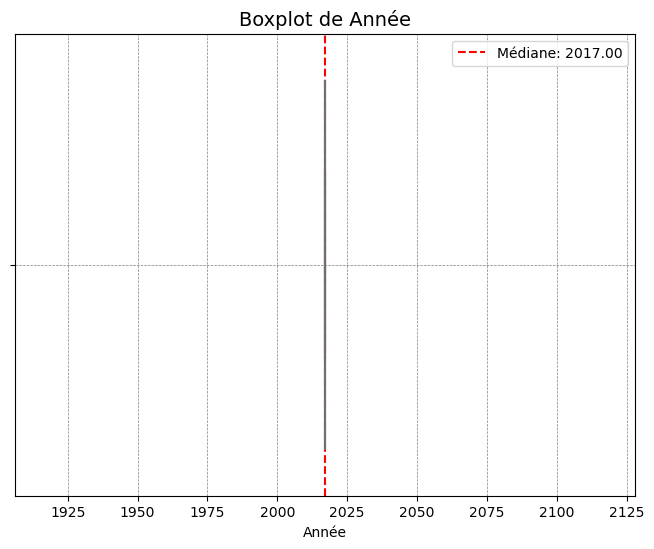

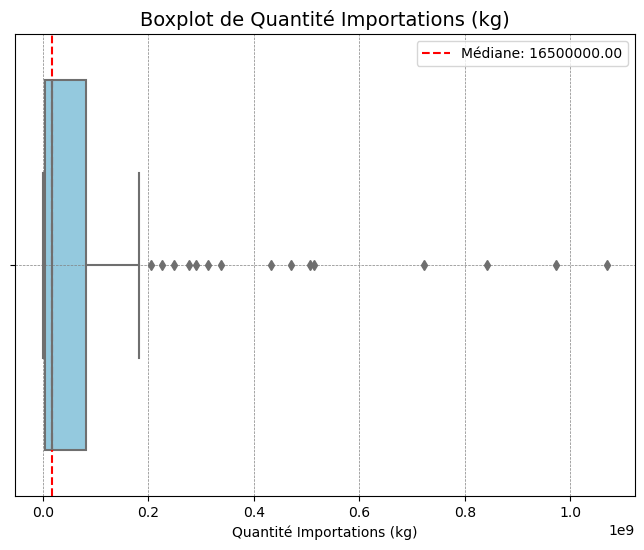

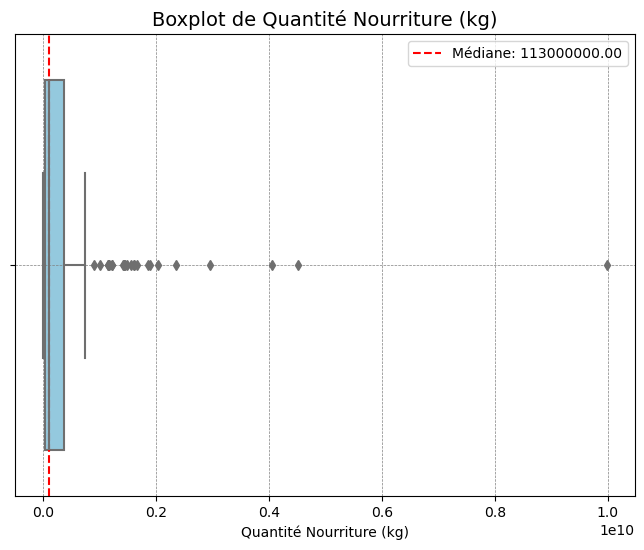

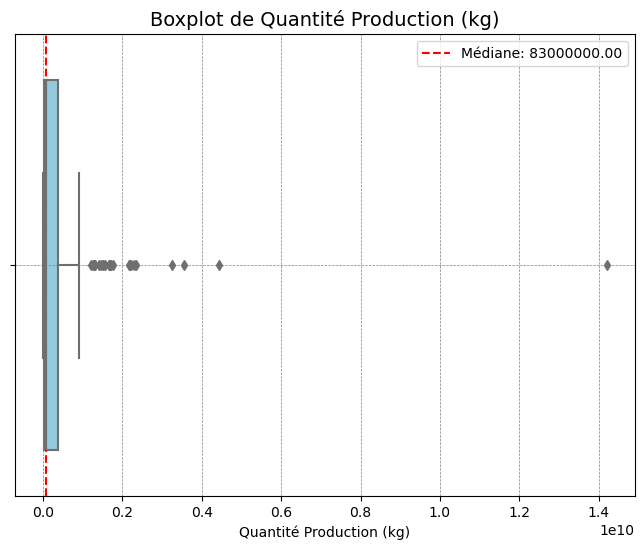

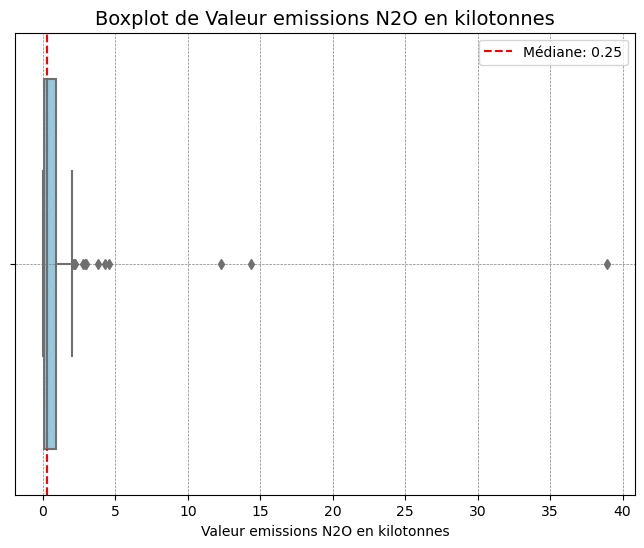

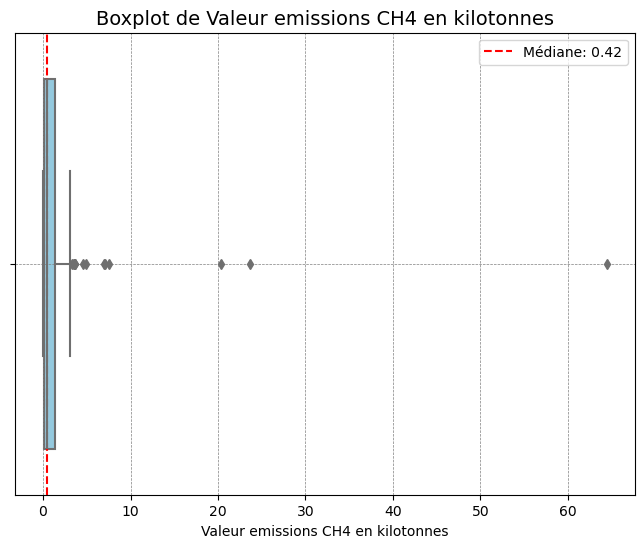

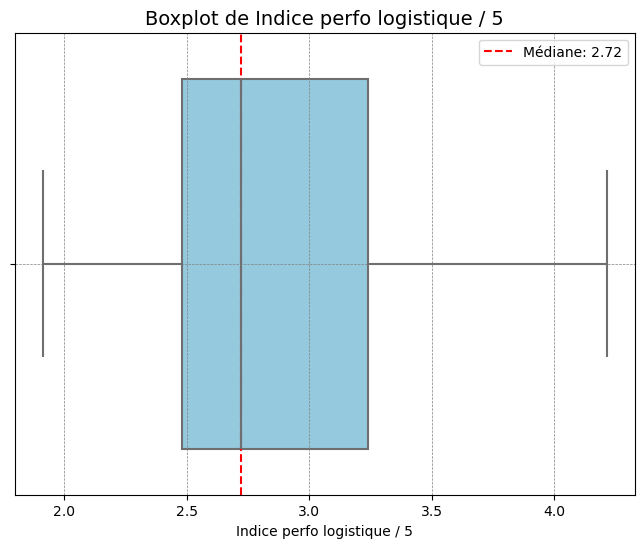

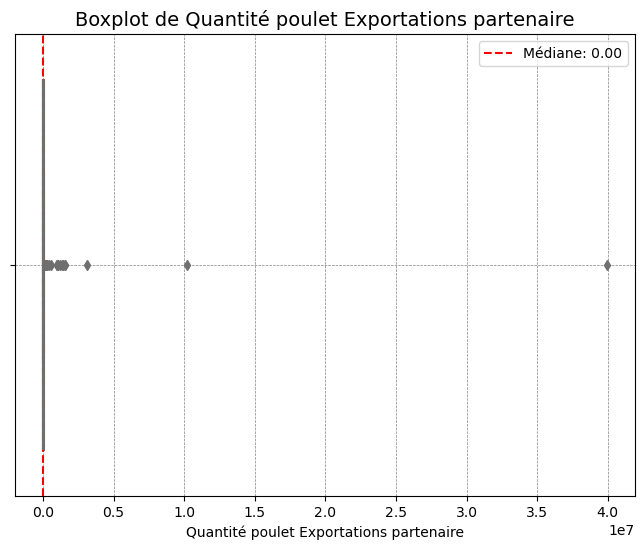

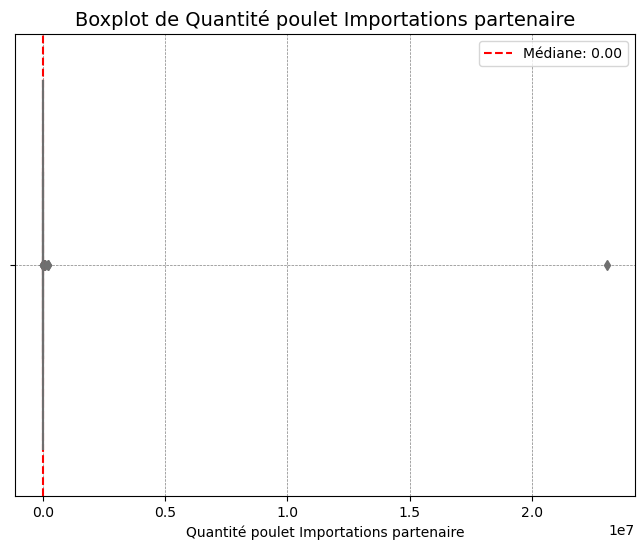

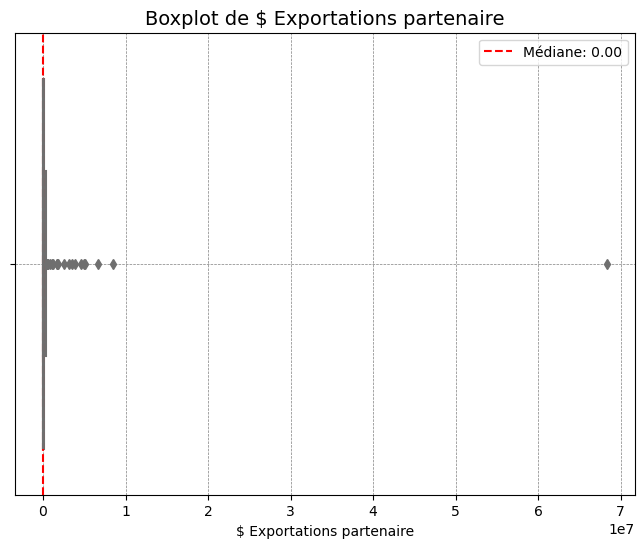

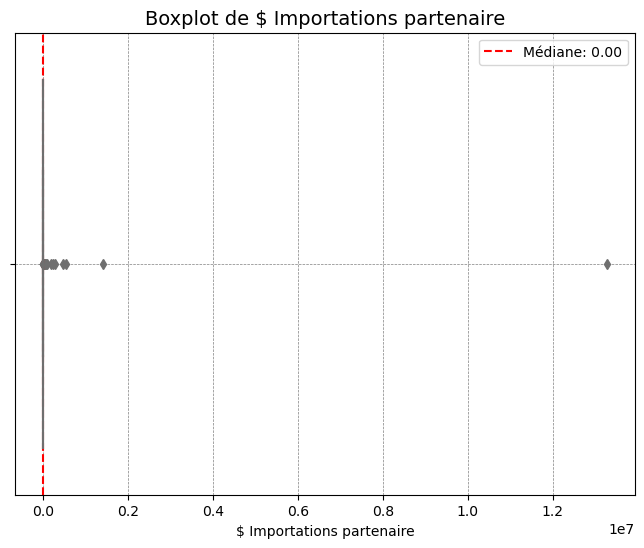

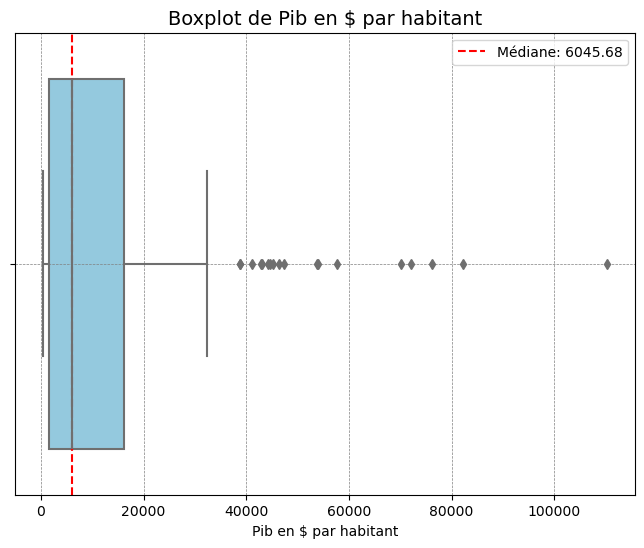

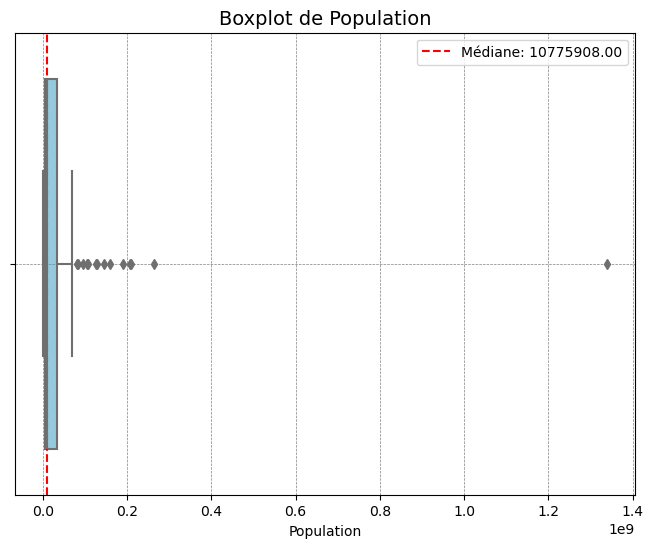

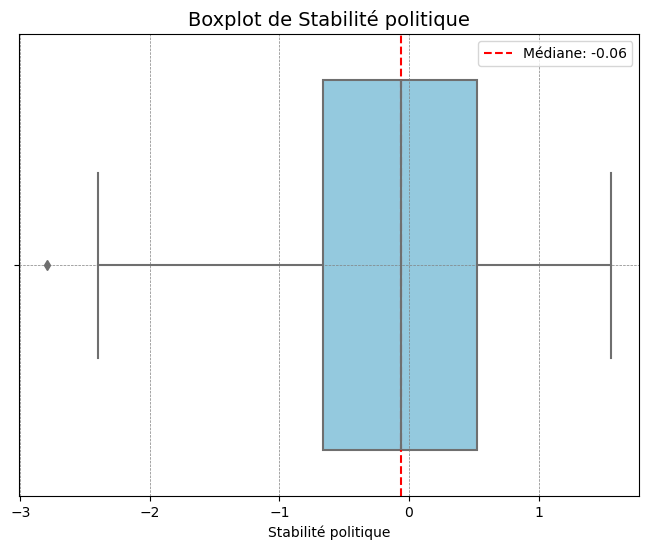

In [67]:
# Définir les colonnes utilisées pour l'ACP (et les boxplots)
# Uniquement les colonnes numériques
columns_for_acp = df.select_dtypes(include=[np.number]).columns.tolist()

# Vérification des colonnes sélectionnées
print("Colonnes sélectionnées pour l'ACP :", columns_for_acp)



# Boxplot pour chaque variable
for col in columns_for_acp:
    plt.figure(figsize=(8, 6))  # Taille de la figure
    sns.boxplot(data=df, x=col, color='skyblue')  # Boxplot pour chaque variable
    
    # Calcul de la médiane
    median = df[col].median()
    
    # Ajouter la médiane avec une ligne rouge
    plt.axvline(median, color='red', linestyle='--', label=f'Médiane: {median:.2f}')
    
    # Ajouter un titre et une légende
    plt.title(f"Boxplot de {col}", fontsize=14)
    plt.legend()
    plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Ajouter une grille légère
    
    # Afficher le boxplot
    plt.show()




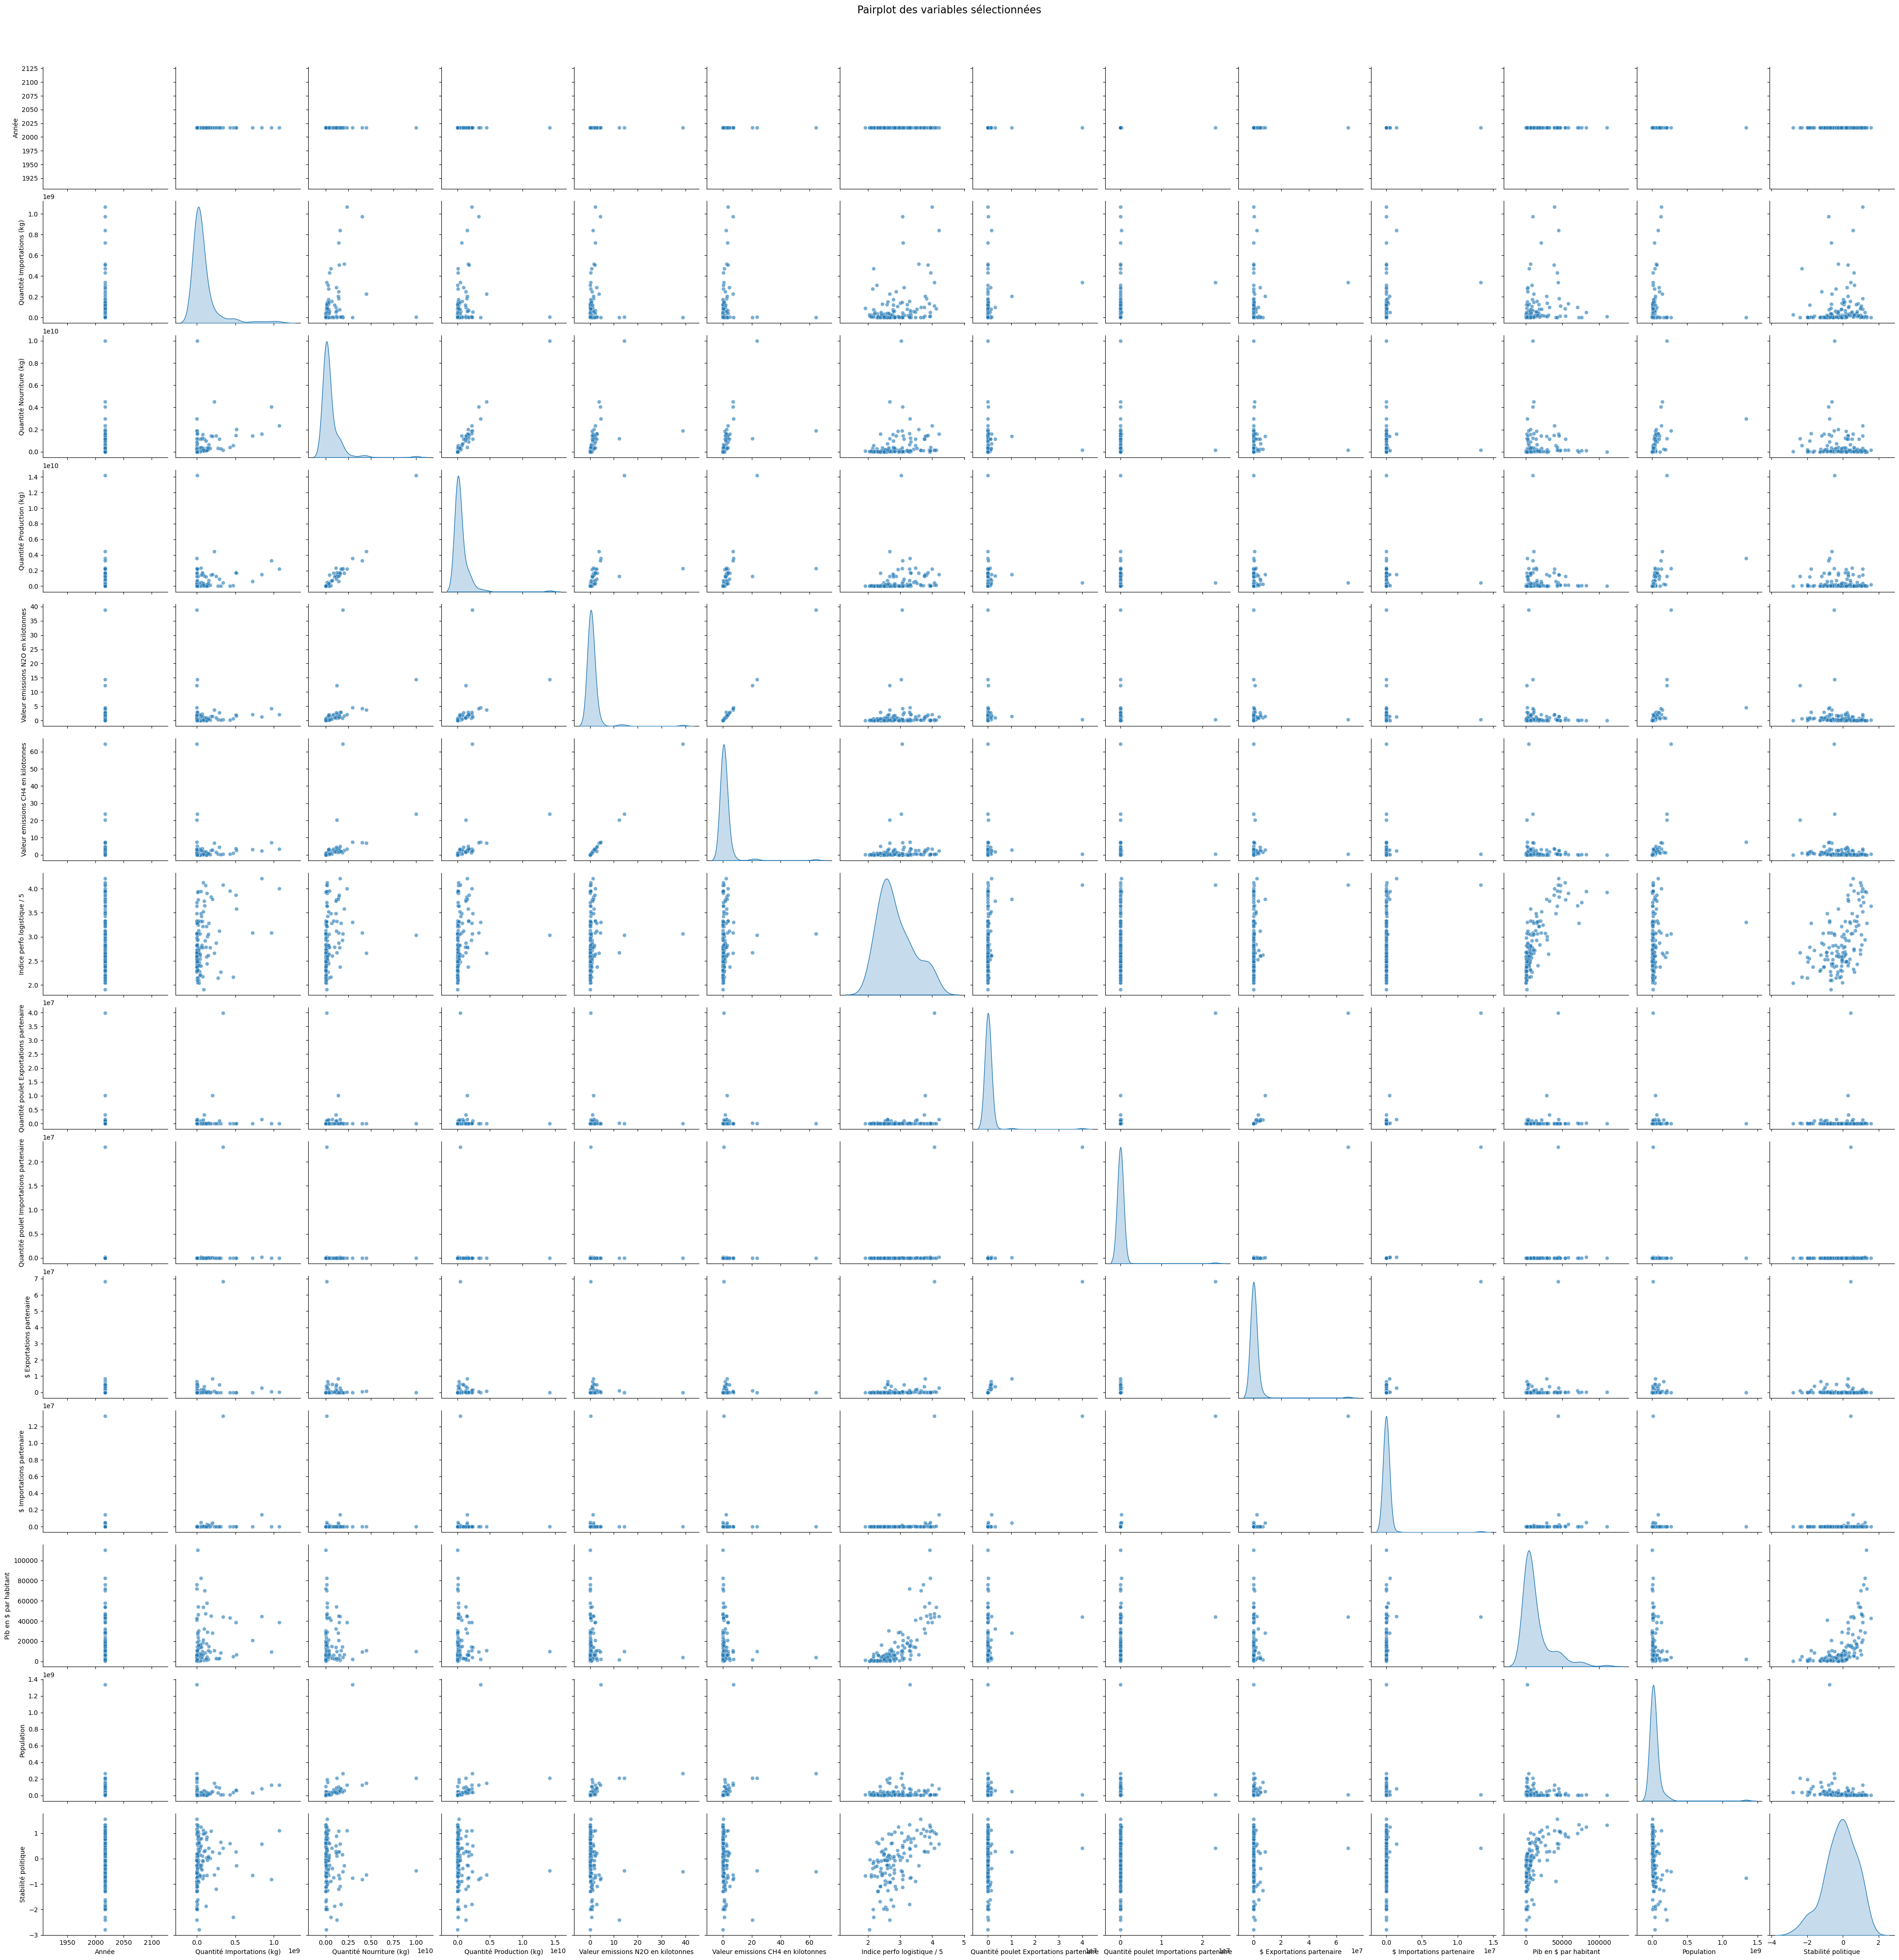

In [68]:
# Pairplot
sns.pairplot(df[columns_for_acp], height=3, diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle("Pairplot des variables sélectionnées", y=1.02, fontsize=16)
plt.show()



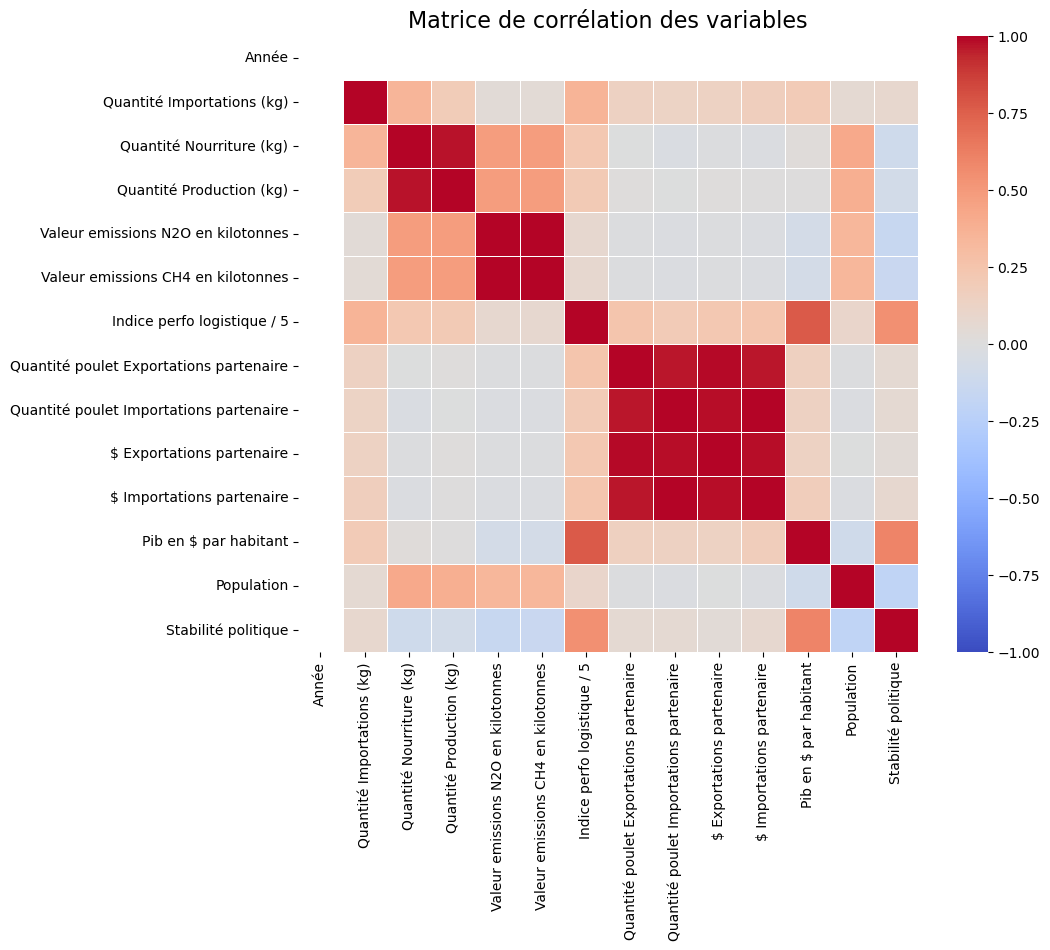

In [69]:
# Calculer la matrice de corrélation
corr_matrix = df[columns_for_acp].corr()

# Heatmap pour la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5, vmin=-1, vmax=1)

# Ajouter un titre
plt.title("Matrice de corrélation des variables", fontsize=16)

# Afficher la heatmap
plt.show()

In [70]:
# Sélection des colonnes pertinentes pour l'ACP
columns_for_acp = ['Quantité Importations (kg)', 
                   'Quantité Production (kg)', 'Valeur emissions N2O en kilotonnes', 
                   'Valeur emissions CH4 en kilotonnes', 'Indice perfo logistique / 5', 
                    '$ Importations partenaire', 'Pib en $ par habitant', 
                   'Population', 'Stabilité politique']

# Création d'un DataFrame avec les données pertinentes
df_acp = df[columns_for_acp]

# Normalisation des données (moyenne = 0, écart-type = 1)
scaler = StandardScaler()
df_acp_scaled = scaler.fit_transform(df_acp)

# Affichage des premières lignes des données normalisées
df_acp_scaled[:5]


array([[-0.32448705, -0.36628712, -0.28407295, -0.28314397, -1.5059636 ,
        -0.11016007, -0.68691002, -0.02027582, -2.99945806],
       [ 2.38889606,  0.77463529,  0.15842351,  0.12440208,  1.2928449 ,
        -0.11016007, -0.36966652,  0.14795645, -0.15747198],
       [-0.27413561, -0.37672876, -0.28449629, -0.2781291 , -0.60968399,
        -0.11016007, -0.48226161, -0.29164126,  0.57850051],
       [-0.47554137, -0.19434824,  0.09817689,  0.06943015, -0.47523967,
        -0.11016007, -0.47792649,  0.02108918, -0.88212182],
       [ 4.22392628,  0.66813063,  0.05499618,  0.09372193,  2.45350076,
         1.10585459,  1.56793456,  0.35626992,  0.80495358]])

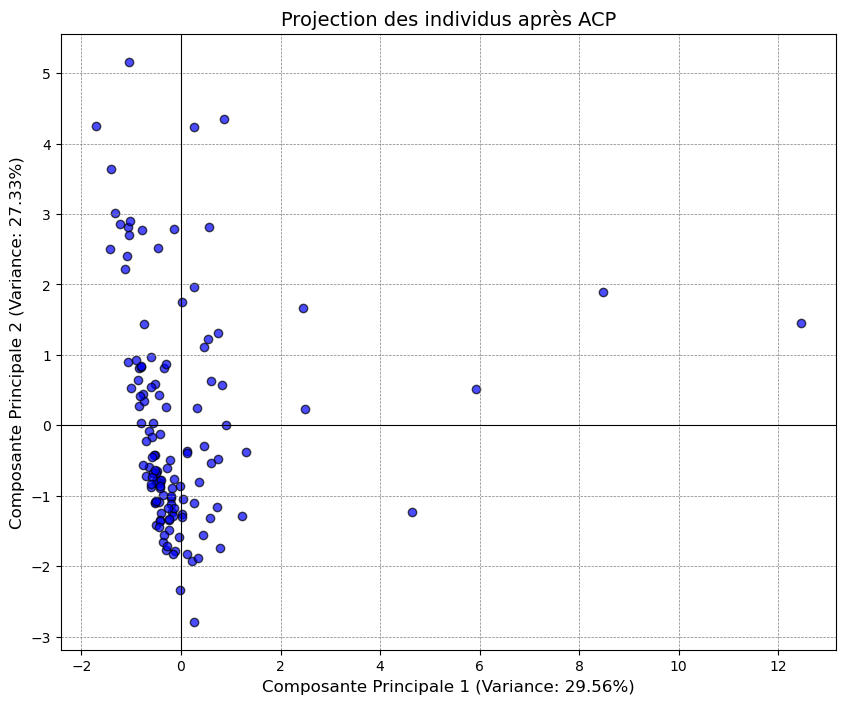

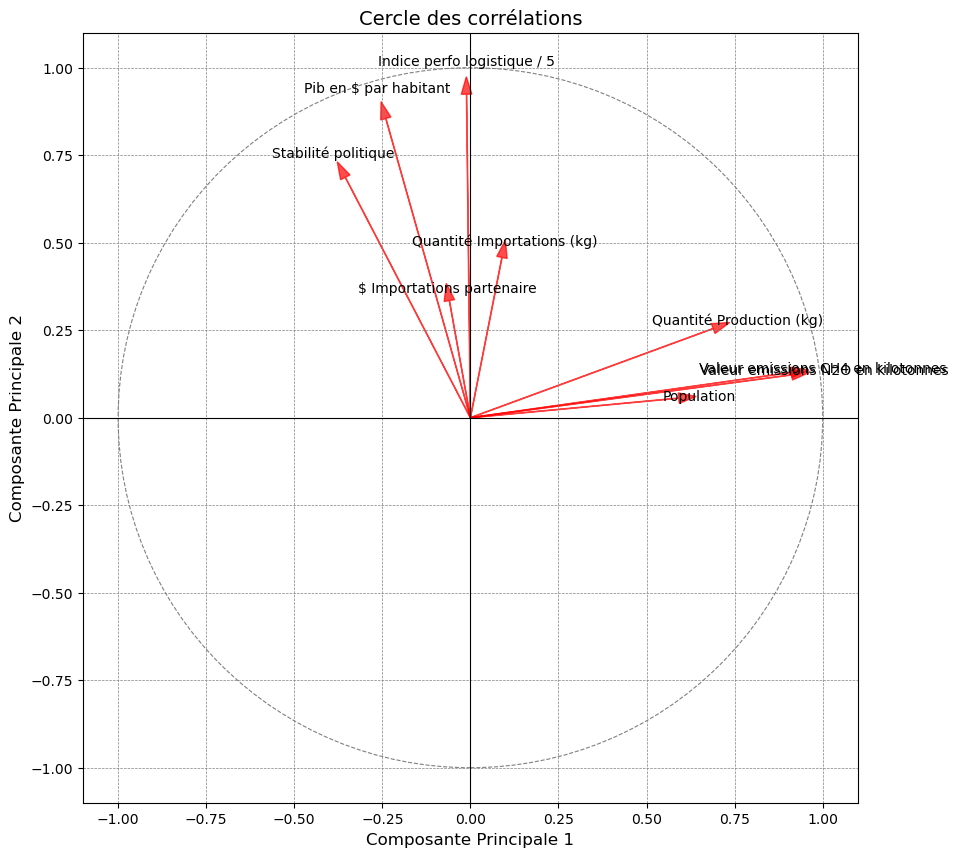

In [71]:
# Application de l'ACP
pca = PCA(n_components=2)  # Réduction à 2 dimensions pour la visualisation
pca_result = pca.fit_transform(df_acp_scaled)

# Création d'un DataFrame avec les résultats de l'ACP
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Projection des individus après ACP
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', marker='o', edgecolors='black', alpha=0.7)
plt.title("Projection des individus après ACP", fontsize=14)
plt.xlabel(f'Composante Principale 1 (Variance: {pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=12)
plt.ylabel(f'Composante Principale 2 (Variance: {pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.show()

# Cercle des corrélations
plt.figure(figsize=(10, 10))

# Dessiner le cercle
plt.gca().add_artist(plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--', linewidth=0.8))

# Affichage des variables sur le cercle des corrélations
loading_scores = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, feature in enumerate(columns_for_acp):
    plt.arrow(0, 0, loading_scores[i, 0], loading_scores[i, 1], color='r', alpha=0.7, head_width=0.03, head_length=0.05)
    plt.text(loading_scores[i, 0] * 1.1, loading_scores[i, 1] * 1.1, feature, color='black', fontsize=10, ha='center', va='center')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.title("Cercle des corrélations", fontsize=14)
plt.xlabel('Composante Principale 1', fontsize=12)
plt.ylabel('Composante Principale 2', fontsize=12)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


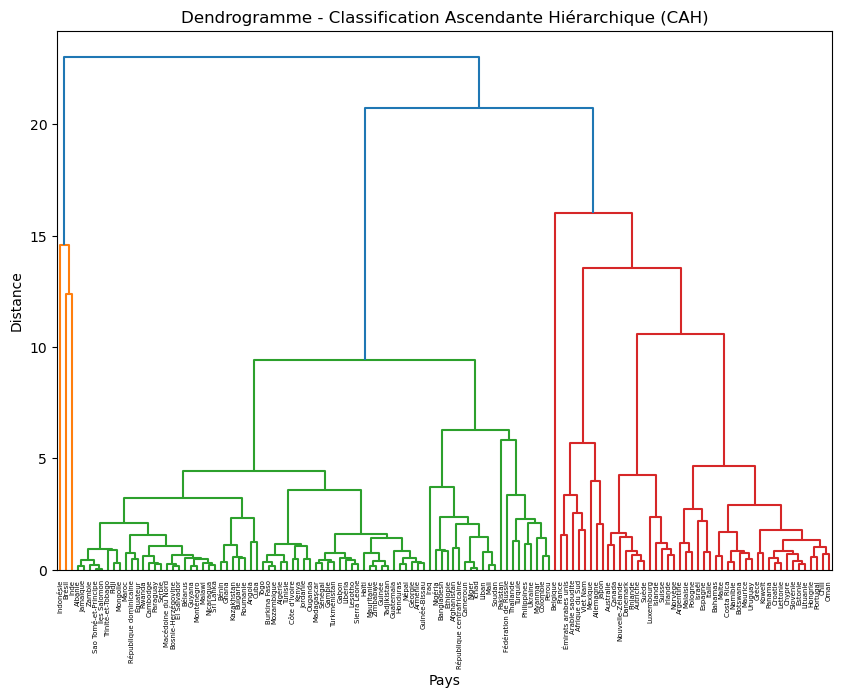

In [72]:
# Application de la CAH
linked = linkage(df_acp_scaled, method='ward')

# Création du dendrogramme
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df['Zone'].to_numpy(), orientation='top', distance_sort='ascending')
plt.title("Dendrogramme - Classification Ascendante Hiérarchique (CAH)")
plt.xlabel("Pays")
plt.ylabel("Distance")
plt.show()


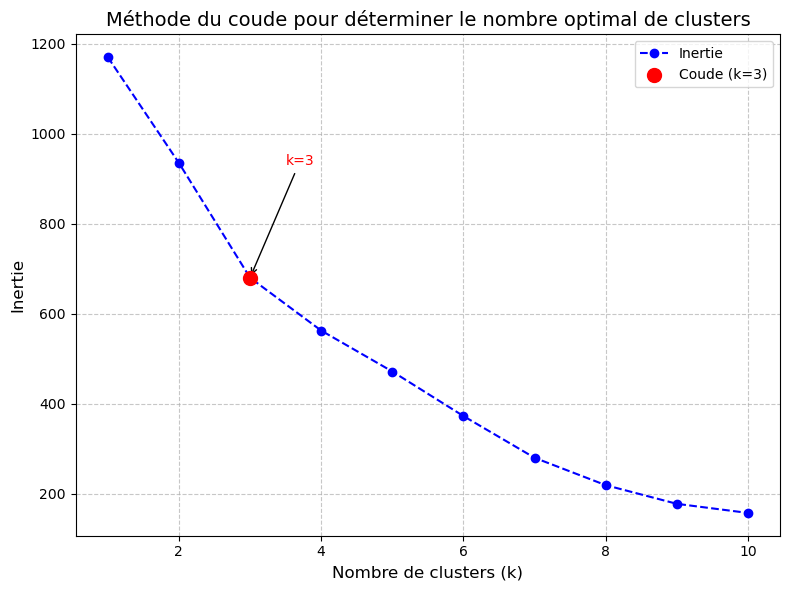

In [73]:
# Calcul des inerties pour différents nombres de clusters (de 1 à 10)
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_acp_scaled)
    inertias.append(kmeans.inertia_)

# Méthode du coude avec mise en évidence de k=3
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--', color='b', label='Inertie')

# Mettre en évidence le point k=3
k_coude = 3
plt.scatter(k_coude, inertias[k_coude - 1], color='red', s=100, zorder=5, label=f'Coude (k={k_coude})')
plt.annotate(f"k={k_coude}", 
             xy=(k_coude, inertias[k_coude - 1]), 
             xytext=(k_coude + 0.5, inertias[k_coude - 1] + 250), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), 
             fontsize=10, color='red')

# Titres et labels
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters', fontsize=14)
plt.xlabel('Nombre de clusters (k)', fontsize=12)
plt.ylabel('Inertie', fontsize=12)

# Grille et légende
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()

# Afficher
plt.show()


In [74]:
# Extraction des clusters de la CAH
num_clusters = 3  # Nombre de clusters à extraire
clusters_cah = fcluster(linked, num_clusters, criterion='maxclust')

# Ajout des clusters CAH au DataFrame
df['Cluster CAH'] = clusters_cah


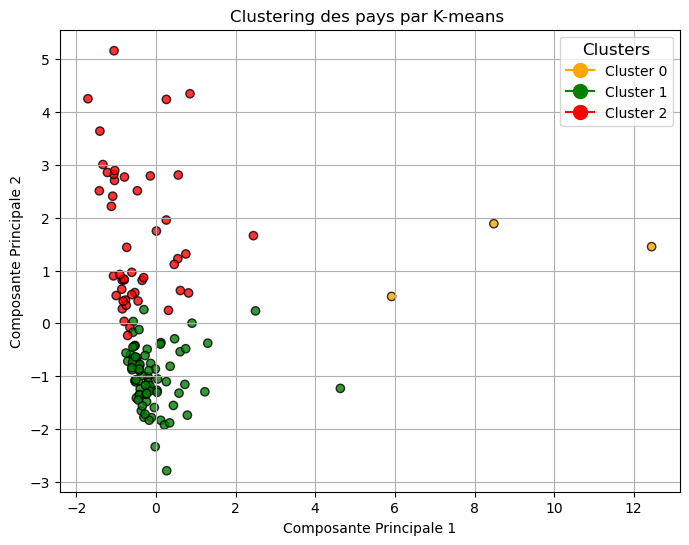

In [75]:
# Définir les couleurs spécifiques pour chaque cluster (0, 1, 2)
# Note : On remappe les clusters 0, 1, 2 aux couleurs orange, vert, rouge
cluster_colors = {0: 'orange', 1: 'green', 2: 'red'}

# Remapper les valeurs des clusters pour correspondre à notre définition
clusters_cah_mapped = [c - 1 for c in clusters_cah]  # Remappe les clusters 1, 2, 3 en 0, 1, 2

# Visualisation des clusters K-means avec les couleurs de la CAH
plt.figure(figsize=(8, 6))
colors_cah = [cluster_colors[c] for c in clusters_cah_mapped]  # Utilise les couleurs définies pour chaque cluster
sc = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colors_cah, edgecolor='k', alpha=0.8)
plt.title('Clustering des pays par K-means ')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.grid(True)

# Ajouter la légende
legend_labels = [f"Cluster {i}" for i in cluster_colors.keys()]
handles = [plt.Line2D([], [], marker='o', color=color, markersize=10, label=label) 
           for color, label in zip(cluster_colors.values(), legend_labels)]
plt.legend(handles=handles, title="Clusters", fontsize=10, title_fontsize=12)

plt.show()


In [76]:
# Vérification que la colonne 'Cluster K-means' existe
if 'Cluster K-means' not in df.columns:
    print("Ajout de la colonne 'Cluster K-means' au DataFrame.")
    df['Cluster K-means'] = kmeans.labels_  # Réattribue les clusters si nécessaire


Ajout de la colonne 'Cluster K-means' au DataFrame.


[1 2 0]


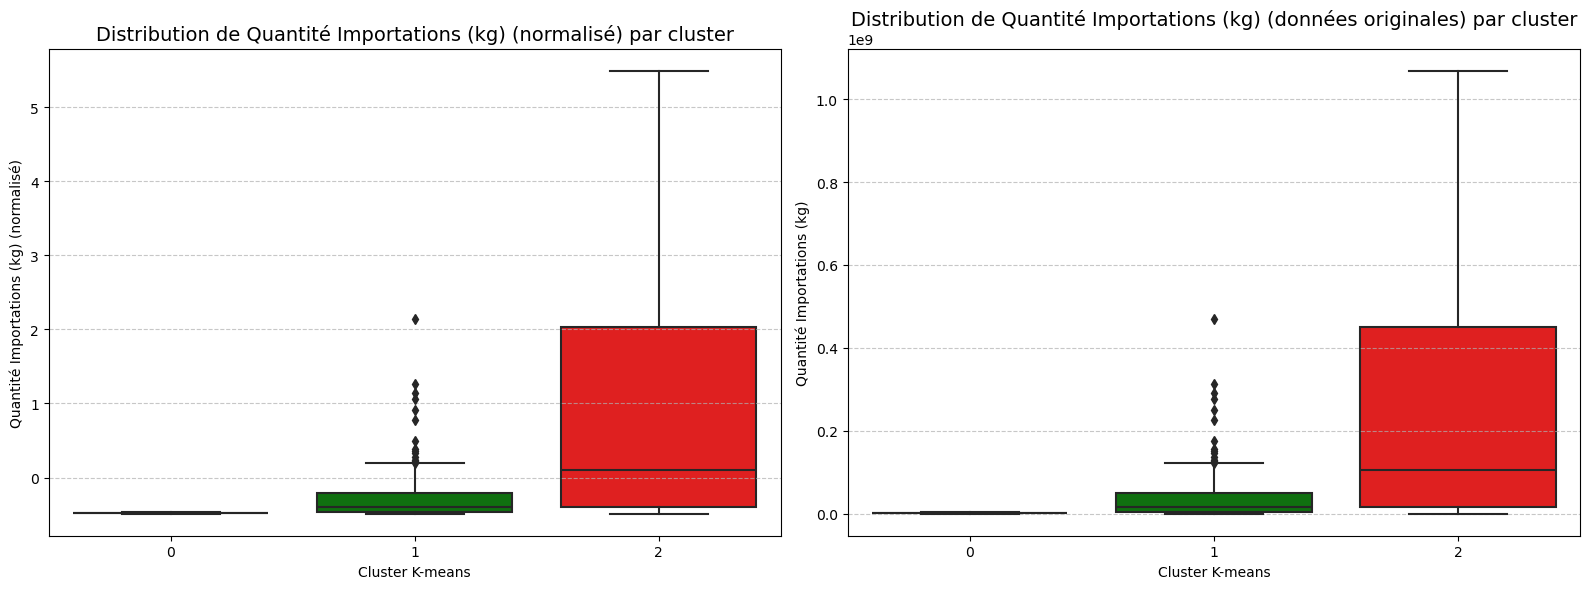

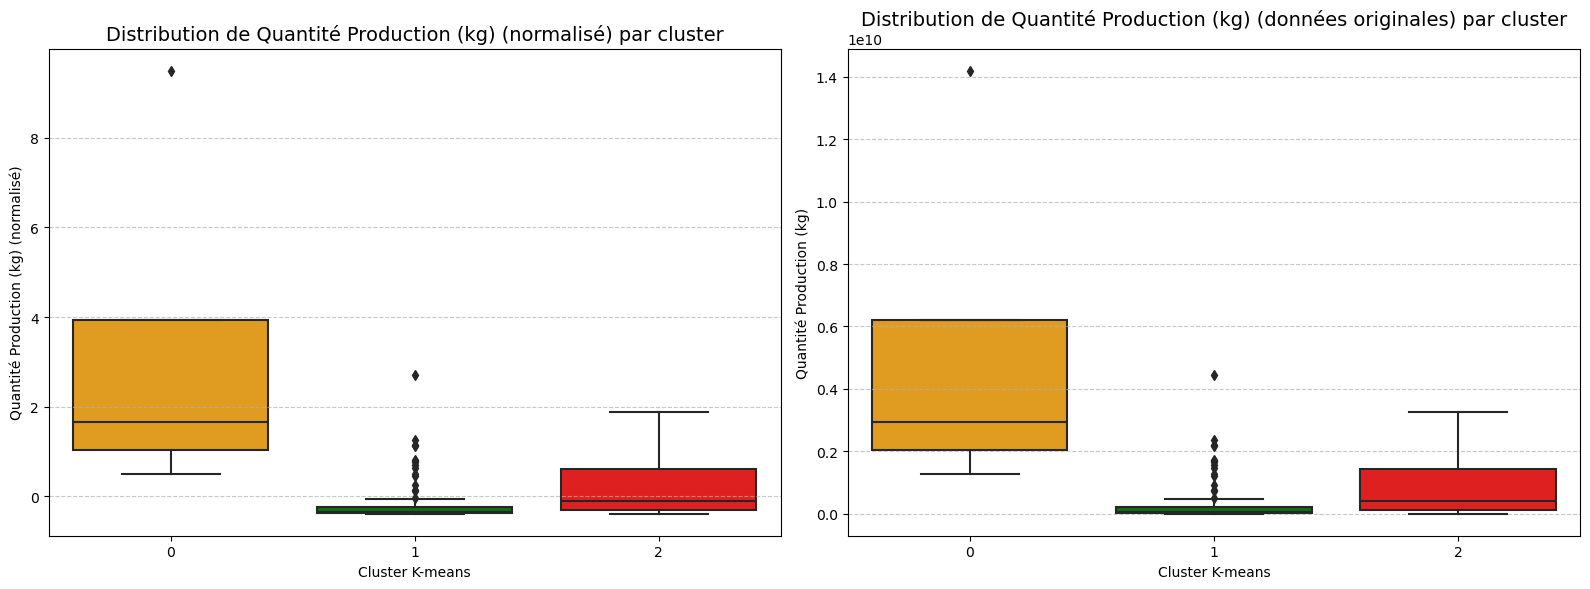

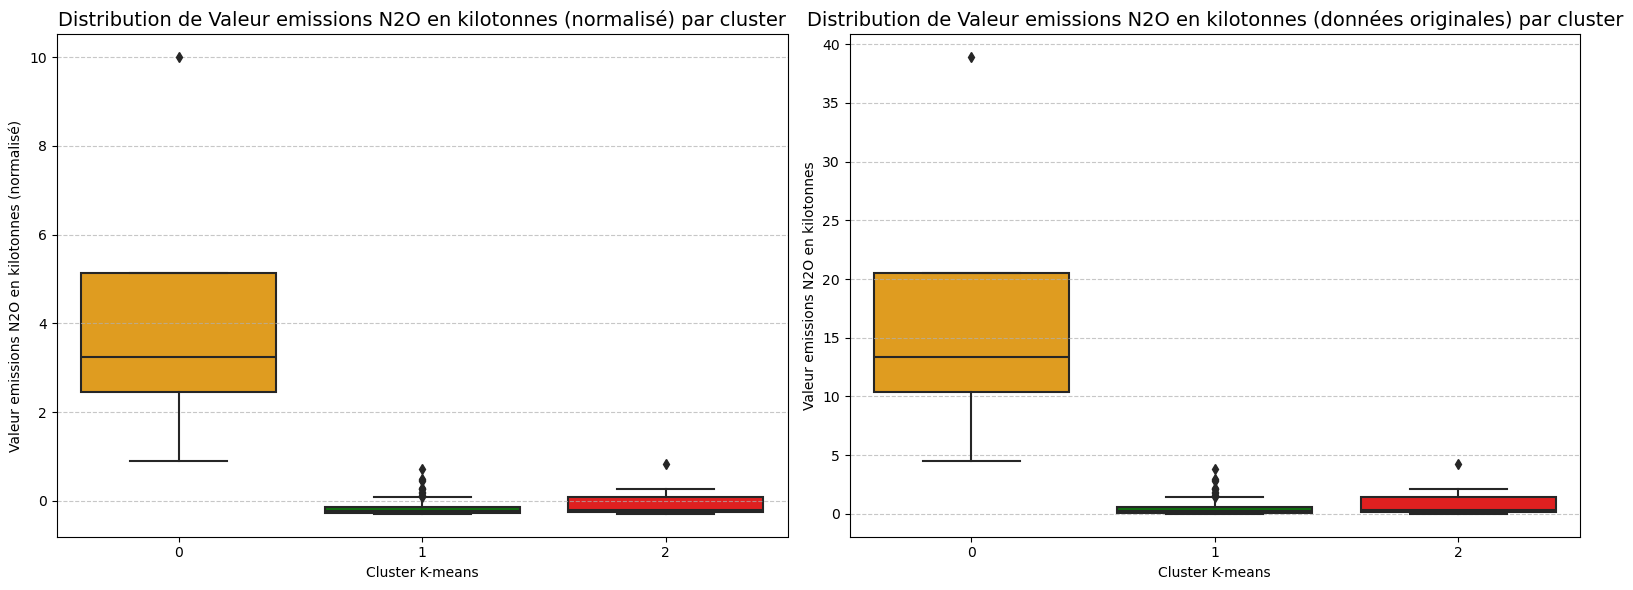

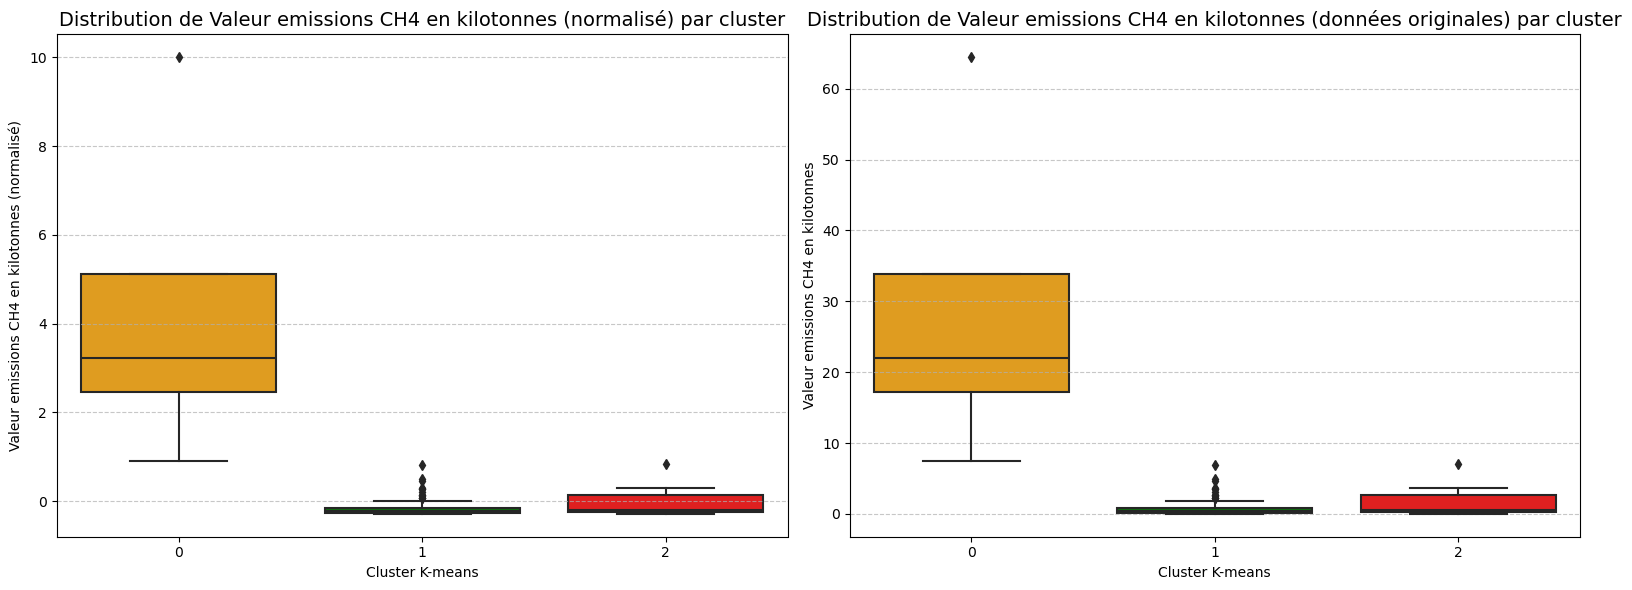

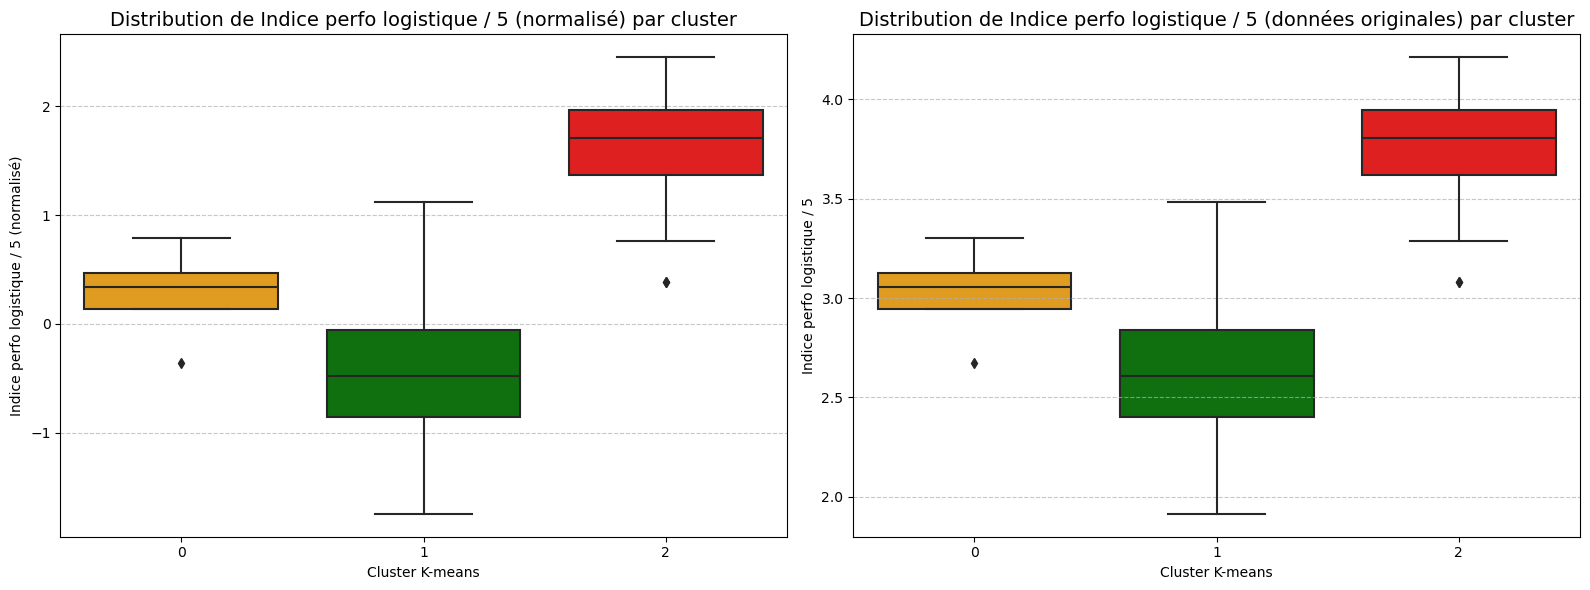

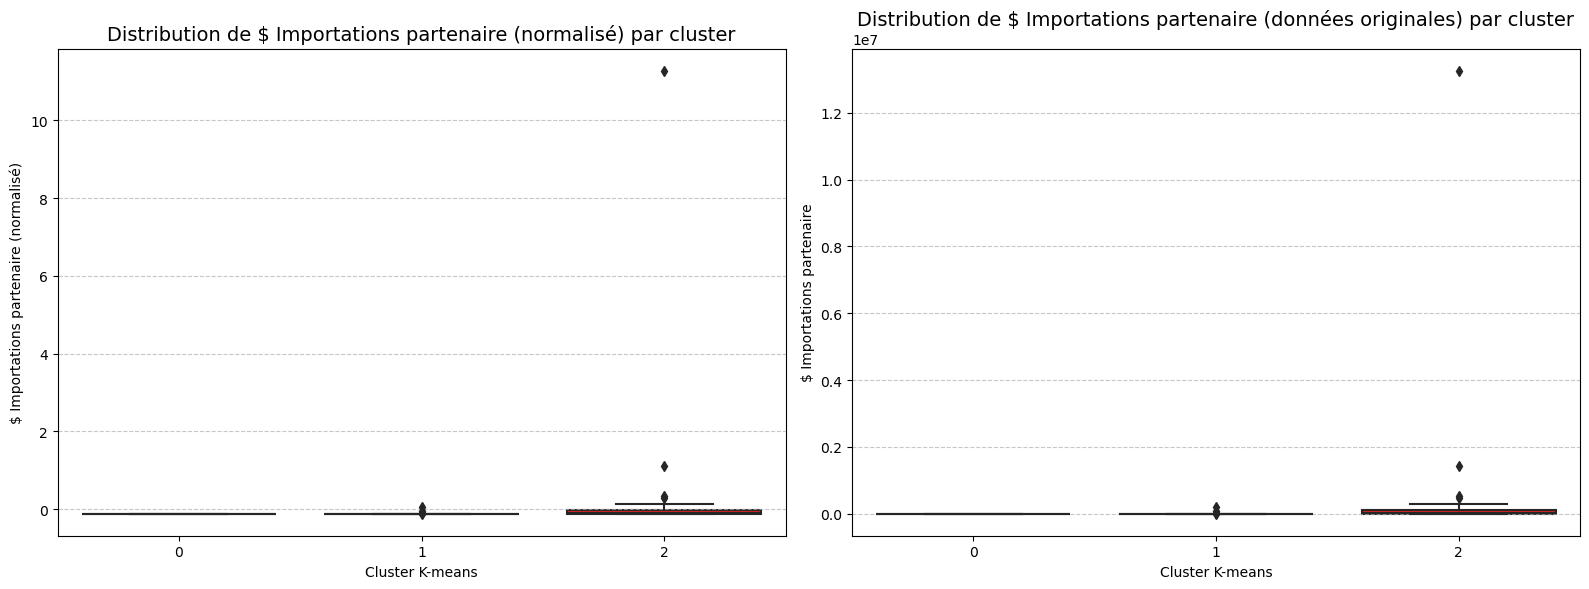

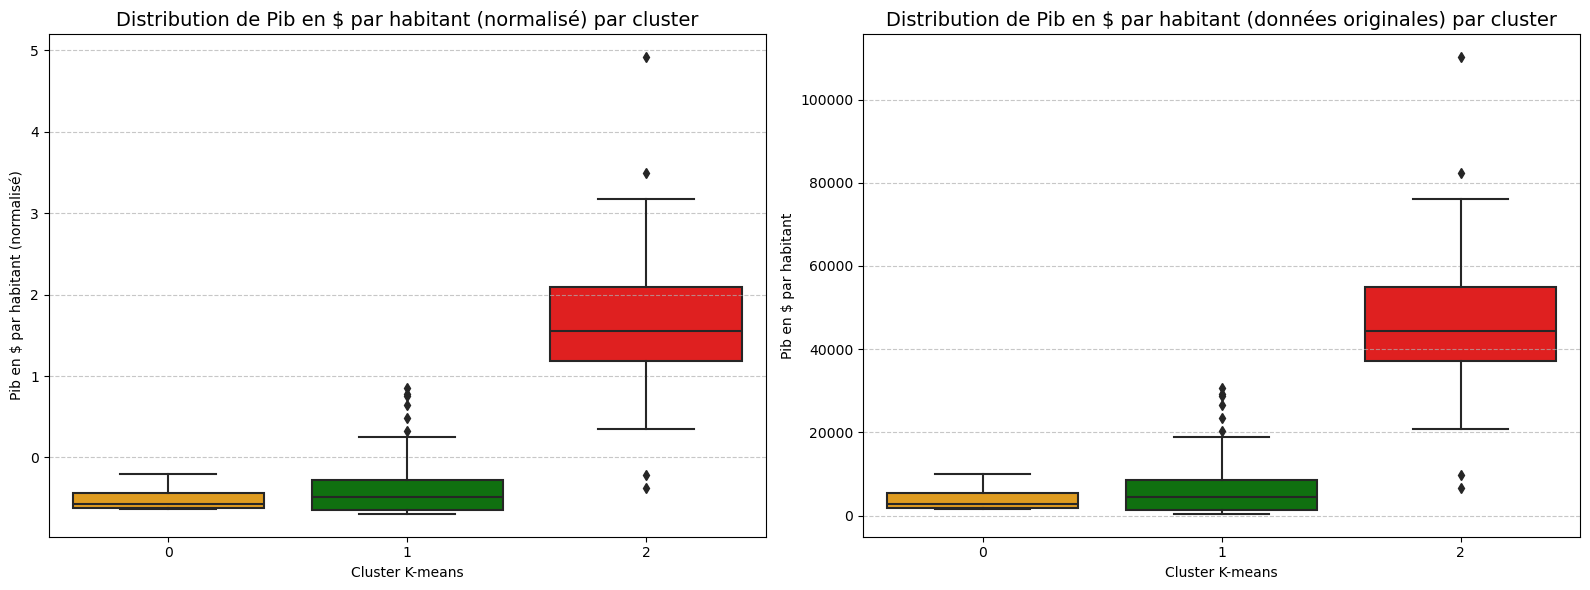

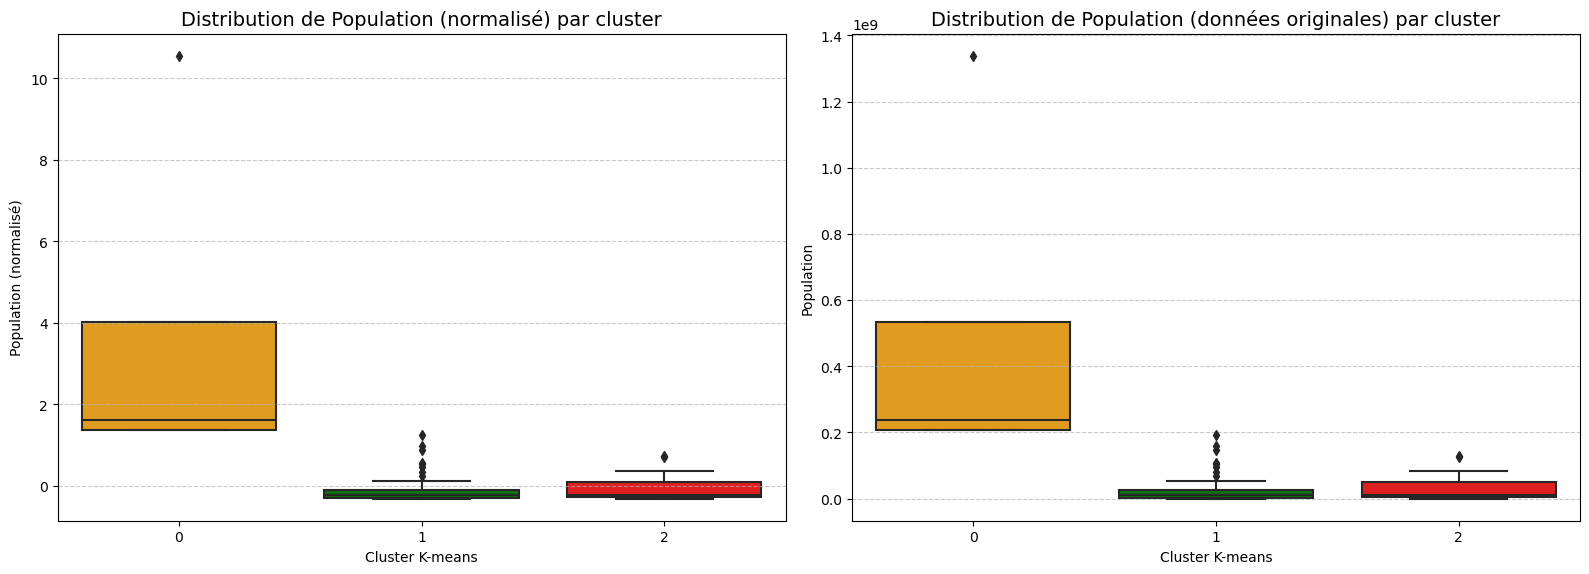

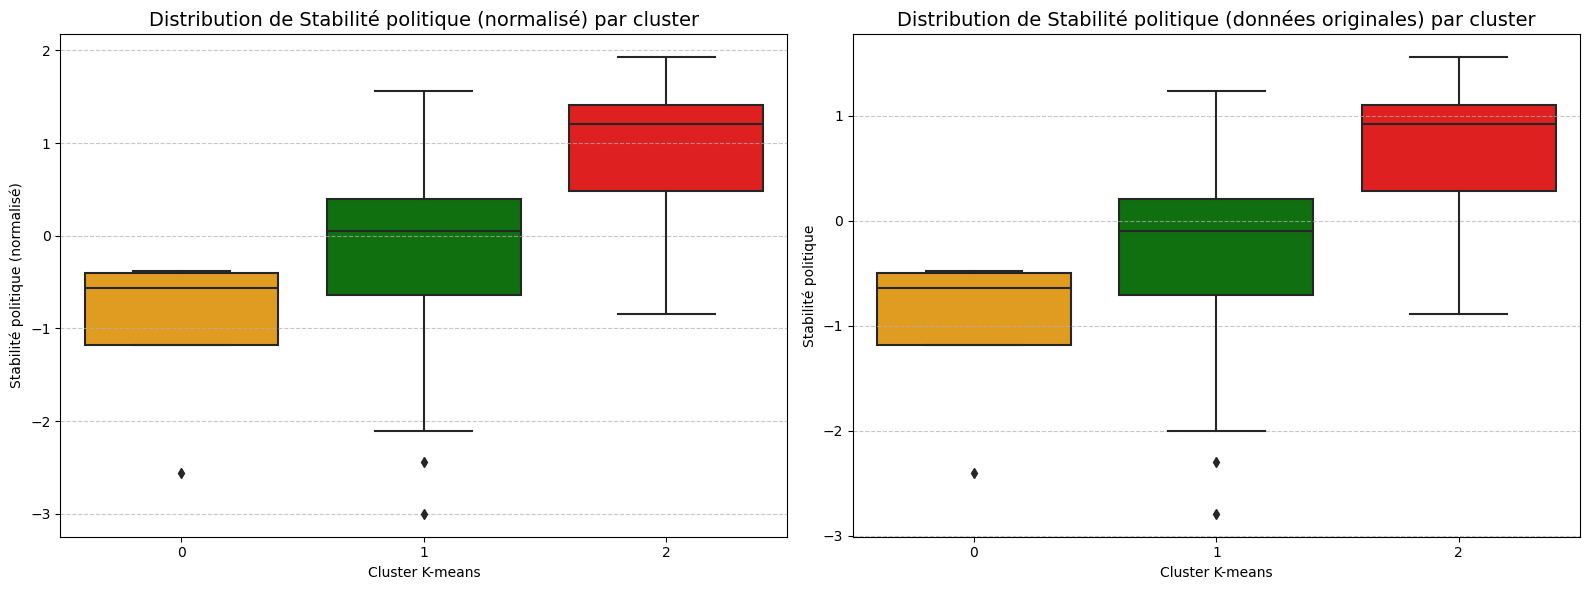

In [77]:
# Application du KMeans pour obtenir les clusters si ce n'est pas déjà fait
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster K-means'] = kmeans.fit_predict(df_acp_scaled)

# Vérification des valeurs uniques dans 'Cluster K-means'
unique_clusters = df['Cluster K-means'].unique()
print(unique_clusters)  # Devrait afficher [0, 1, 2]

# Définir les couleurs spécifiques pour chaque cluster (0, 1, 2)
cluster_colors = {0: 'orange', 1: 'green', 2: 'red'}

# Concaténer les données normalisées avec la colonne 'Cluster K-means'
df_acp_scaled_df = pd.DataFrame(df_acp_scaled, columns=columns_for_acp)
df_for_boxplot = pd.concat([df_acp_scaled_df, df['Cluster K-means']], axis=1)

# Pour chaque variable analysée dans l'ACP
for col in columns_for_acp:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Boxplot des données normalisées
    sns.boxplot(ax=axes[0], x='Cluster K-means', y=col, 
                data=df_for_boxplot, palette=cluster_colors)
    axes[0].set_title(f"Distribution de {col} (normalisé) par cluster", fontsize=14)
    axes[0].set_xlabel('Cluster K-means')
    axes[0].set_ylabel(f"{col} (normalisé)")
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Boxplot des données d'origine
    sns.boxplot(ax=axes[1], x='Cluster K-means', y=col, data=df, palette=cluster_colors)
    axes[1].set_title(f"Distribution de {col} (données originales) par cluster", fontsize=14)
    axes[1].set_xlabel('Cluster K-means')
    axes[1].set_ylabel(col)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


In [78]:
# Grouper par cluster et calculer les statistiques pour chaque variable
stats_by_cluster = df.groupby('Cluster K-means')[columns_for_acp].agg(['mean', 'median', 'std', 'min', 'max'])

# Affichage des résultats
print("Statistiques par cluster :")
for col in columns_for_acp:
    print(f"\n{col} :")
    print(stats_by_cluster[col].T)  # Transposer pour une meilleure lisibilité


Statistiques par cluster :

Quantité Importations (kg) :
Cluster K-means             0             1             2
mean             1.500000e+06  4.722549e+07  2.702917e+08
median           1.500000e+06  1.550000e+07  1.045000e+08
std              1.290994e+06  7.891277e+07  3.315017e+08
min              0.000000e+00  0.000000e+00  0.000000e+00
max              3.000000e+06  4.700000e+08  1.069000e+09

Quantité Production (kg) :
Cluster K-means             0             1             2
mean             5.332000e+09  3.092843e+08  7.987500e+08
median           2.923000e+09  6.050000e+07  4.120000e+08
std              5.984705e+09  6.655983e+08  8.653247e+08
min              1.281000e+09  0.000000e+00  0.000000e+00
max              1.420100e+10  4.444000e+09  3.249000e+09

Valeur emissions N2O en kilotonnes :
Cluster K-means          0         1         2
mean             17.523950  0.520503  0.871275
median           13.329300  0.220100  0.310400
std              14.864885  0.736370  1.

## Cluster 0 (Marché 0)
<div style="background-color: rgba(255, 165, 0, 0.3); padding: 10px;">
  
| Variable                      | Valeur                                |
|-------------------------------|---------------------------------------|
| **Importations de poulet**     | Relativement faibles (35 750 kg)      |
| **Production de poulet**       | Très élevée (5,3 milliards de kg)     |
| **Émissions de N2O**           | Très élevées (17,5 kilotonnes)       |
| **Émissions de CH4**           | Très élevées (29 kilotonnes)         |
| **Performance logistique**     | Moyenne (3,02/5)                     |
| **Exportations partenaires**   | Faibles (~276 500 dollars)           |
| **Importations partenaires**   | Nulle                                 |
| **PIB par habitant**           | Relativement faible (4 315 dollars)  |
| **Stabilité politique**        | Très faible (-1,04)                   |

</div>

## Cluster 1 (Marché 1)
<div style="background-color: rgba(0, 128, 0, 0.3); padding: 10px;">

| Variable                      | Valeur                                |
|-------------------------------|---------------------------------------|
| **Importations de poulet**     | Modérées (73 366 kg)                  |
| **Production de poulet**       | Faible (309 millions de kg)           |
| **Émissions de N2O**           | Relativement faibles (0,52 kilotonnes)|
| **Émissions de CH4**           | Relativement faibles (0,81 kilotonnes)|
| **Performance logistique**     | Moyenne (2,66/5)                     |
| **Exportations partenaires**   | Modérées (~371 000 dollars)          |
| **Importations partenaires**   | Modérées (~2 900 dollars)            |
| **PIB par habitant**           | Modéré (6 574 dollars)               |
| **Stabilité politique**        | Moyenne (-0,29)                      |

</div>

## Cluster 2 (Marché 2)
<div style="background-color: rgba(255, 0, 0, 0.3); padding: 10px;">

| Variable                      | Valeur                                |
|-------------------------------|---------------------------------------|
| **Importations de poulet**     | Très élevées (987 328 kg)            |
| **Production de poulet**       | Modérée (798 millions de kg)         |
| **Émissions de N2O**           | Modérées (0,87 kilotonnes)           |
| **Émissions de CH4**           | Modérées (1,49 kilotonnes)           |
| **Performance logistique**     | Très élevée (3,76/5)                 |
| **Exportations partenaires**   | Très élevées (~3,64 millions de dollars) |
| **Importations partenaires**   | Très élevées (682 942 dollars)       |
| **PIB par habitant**           | Très élevé (47 001 dollars)          |
| **Stabilité politique**        | Très élevée (0,64)                   |

</div>

## Interprétation des clusters

### Cluster 0 (Marché 0) :
Ce cluster regroupe des pays avec une production massive de poulet mais peu d'importation. Ils ont une faible stabilité politique et un PIB par habitant assez bas, ce qui pourrait représenter des marchés en développement ou en transition. Les faibles importations de poulet et la faible performance logistique suggèrent que ces marchés peuvent avoir une production locale suffisante ou des défis dans l'infrastructure logistique. Ce cluster pourrait ne pas être une priorité pour l'exportation de poulets, sauf s'il y a des besoins spécifiques en termes de produits ou de technologie.

### Cluster 1 (Marché 1) :
Les pays de ce cluster présentent une importation modérée de poulet et une production faible. Ces pays ont un PIB modéré et une performance logistique moyenne. Les exportations et importations partenaires sont équilibrées, ce qui pourrait indiquer des marchés intermédiaires en termes de consommation et d'exportation. Ce cluster pourrait être une cible raisonnable si vous visez des marchés intermédiaires ou des partenariats où la demande en poulet est stable mais pas encore saturée.

### Cluster 2 (Marché 2) :
Ce cluster représente des pays avec une importation de poulet élevée, une production modérée, un PIB très élevé, et une bonne stabilité politique. Ces pays ont également une excellente performance logistique. Ce sont des marchés très développés et des cibles idéales pour l'exportation. Ils sont probablement très réceptifs à l'importation de produits étrangers et sont capables de traiter des volumes importants. Ce cluster représente les marchés les plus prometteurs pour l'exportation de poulets, notamment grâce à leur stabilité économique et politique.

## Stratégie de ciblage

Sur la base des caractéristiques de chaque cluster

- **Cibler le Cluster 2** pour les exportations à grande échelle vers des pays ayant un PIB élevé, une forte demande, une bonne stabilité politique, et des infrastructures solides.
- **Explorer le Cluster 1** pour des opportunités dans des marchés intermédiaires où les importations sont modérées mais où un potentiel de croissance pourrait exister.
- **Éviter le Cluster 0** si la priorité est donnée aux pays ayant une forte demande d'importation et une meilleure stabilité politique. Cependant, si le prix est une priorité, certains pays de ce cluster pourraient représenter des opportunités si la production locale est insuffisante.


In [79]:
# Filtrer les pays du Cluster 2
cluster_2_countries = df[df['Cluster K-means'] == 2]

# Afficher la liste des pays du Cluster 2
print(cluster_2_countries[['Zone', 'Cluster K-means']])


                    Zone  Cluster K-means
1         Afrique du Sud                2
4              Allemagne                2
6        Arabie saoudite                2
9              Australie                2
10              Autriche                2
13              Belgique                2
23                Canada                2
31              Danemark                2
33               Espagne                2
36              Finlande                2
37                France                2
54               Irlande                2
55               Islande                2
56                Israël                2
57                Italie                2
59                 Japon                2
69            Luxembourg                2
79               Mexique                2
88               Norvège                2
89      Nouvelle-Zélande                2
98              Portugal                2
110               Suisse                2
111                Suède          

In [80]:
# Trier les pays du Cluster 2 par PIB en décroissant
cluster_2_pib_sorted = cluster_2_countries.sort_values(by='Pib en $ par habitant', ascending=False)

# Afficher la liste triée par PIB
print(cluster_2_pib_sorted[['Zone', 'Pib en $ par habitant']])


                    Zone  Pib en $ par habitant
69            Luxembourg          110193.213797
110               Suisse           82254.376927
88               Norvège           76131.838403
55               Islande           72010.149032
54               Irlande           70150.737016
31              Danemark           57610.098180
9              Australie           53954.553495
111                Suède           53791.508730
10              Autriche           47429.158456
36              Finlande           46412.136478
23                Canada           45129.628117
4              Allemagne           44652.589172
13              Belgique           44198.482391
126  Émirats arabes unis           43063.967479
89      Nouvelle-Zélande           42913.186956
56                Israël           41114.781708
59                 Japon           38834.052934
37                France           38781.049487
57                Italie           32406.720315
33               Espagne           28185

In [81]:
# Trier les pays du Cluster 2 par Stabilité politique en croissant (plus élevé = plus stable)
cluster_2_stability_sorted = cluster_2_countries.sort_values(by='Stabilité politique', ascending=False)

# Afficher la liste triée par Stabilité politique
print(cluster_2_stability_sorted[['Zone', 'Stabilité politique']])


                    Zone  Stabilité politique
89      Nouvelle-Zélande                 1.56
55               Islande                 1.34
69            Luxembourg                 1.31
110               Suisse                 1.24
88               Norvège                 1.15
98              Portugal                 1.11
59                 Japon                 1.10
23                Canada                 1.09
36              Finlande                 1.06
10              Autriche                 1.03
54               Irlande                 0.99
111                Suède                 0.97
9              Australie                 0.88
31              Danemark                 0.85
126  Émirats arabes unis                 0.60
4              Allemagne                 0.57
13              Belgique                 0.42
57                Italie                 0.29
37                France                 0.27
33               Espagne                 0.27
1         Afrique du Sud          

In [82]:
# Trier les pays du Cluster 2 par Indice perfo logistique / 5 en décroissant
cluster_2_logistics_sorted = cluster_2_countries.sort_values(by='Indice perfo logistique / 5', ascending=False)

# Afficher la liste triée par logistique
print(cluster_2_logistics_sorted[['Zone', 'Indice perfo logistique / 5']])


                    Zone  Indice perfo logistique / 5
4              Allemagne                     4.212983
111                Suède                     4.127296
13              Belgique                     4.074269
10              Autriche                     4.063993
59                 Japon                     4.000232
126  Émirats arabes unis                     3.950884
36              Finlande                     3.945372
110               Suisse                     3.943579
69            Luxembourg                     3.924704
31              Danemark                     3.902897
37                France                     3.870477
23                Canada                     3.830354
33               Espagne                     3.778706
9              Australie                     3.771692
57                Italie                     3.747707
88               Norvège                     3.716082
54               Irlande                     3.652443
89      Nouvelle-Zélande    

In [83]:
# Ajouter les rangs pour chaque critère dans les trois listes triées
cluster_2_pib_sorted['Rang PIB'] = range(1, len(cluster_2_pib_sorted) + 1)
cluster_2_stability_sorted['Rang Stabilité politique'] = range(1, len(cluster_2_stability_sorted) + 1)
cluster_2_logistics_sorted['Rang Logistique'] = range(1, len(cluster_2_logistics_sorted) + 1)


In [84]:
# Fusionner les trois DataFrames sur la colonne "Zone" (nom du pays)
comparison_df = pd.merge(cluster_2_pib_sorted[['Zone', 'Rang PIB']], 
                         cluster_2_stability_sorted[['Zone', 'Rang Stabilité politique']], 
                         on='Zone', how='inner')

comparison_df = pd.merge(comparison_df, cluster_2_logistics_sorted[['Zone', 'Rang Logistique']], 
                         on='Zone', how='inner')


In [85]:
# Ajouter un score global en additionnant les rangs
comparison_df['Score global'] = comparison_df['Rang PIB'] + comparison_df['Rang Stabilité politique'] + comparison_df['Rang Logistique']


In [86]:
# Trier les pays par score global croissant (meilleur score = meilleurs pays)
comparison_df_sorted = comparison_df.sort_values(by='Score global')

# Afficher le top des pays
display(comparison_df_sorted[['Zone', 'Rang PIB', 'Rang Stabilité politique', 'Rang Logistique', 'Score global']])


,Zone,Rang PIB,Rang Stabilité politique,Rang Logistique,Score global
0,Luxembourg,1,3,9,13
1,Suisse,2,4,8,14
7,Suède,8,12,2,22
8,Autriche,9,10,4,23
2,Norvège,3,5,16,24
9,Finlande,10,9,7,26
3,Islande,4,2,22,28
16,Japon,17,7,5,29
11,Allemagne,12,16,1,29
5,Danemark,6,14,10,30


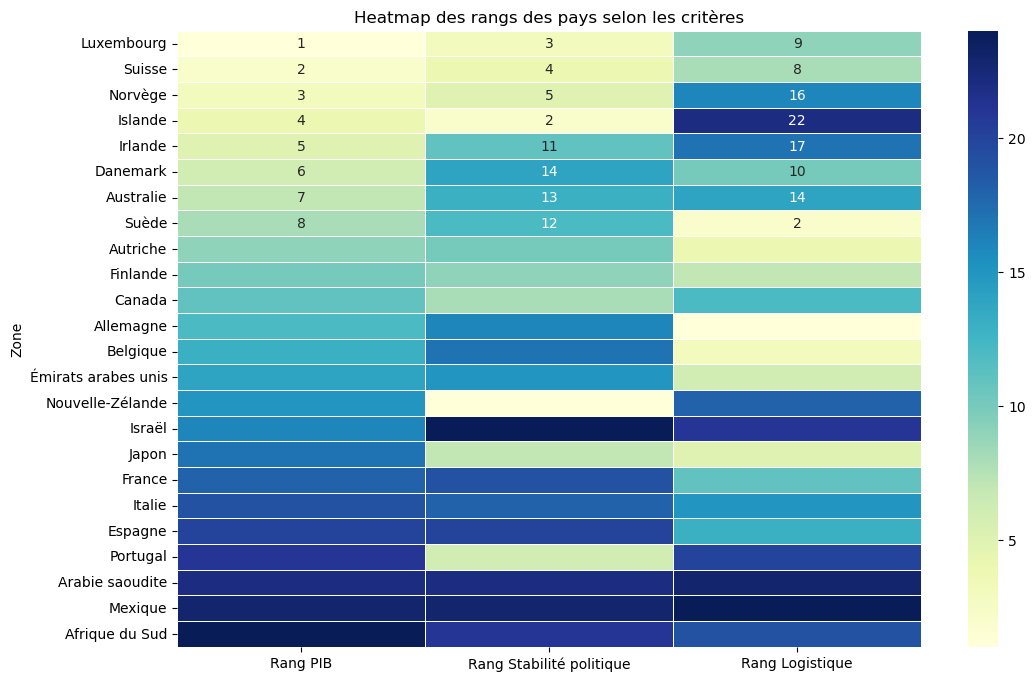

In [87]:

# Créez un DataFrame pour la heatmap avec les rangs des pays
heatmap_df = comparison_df[['Zone', 'Rang PIB', 'Rang Stabilité politique', 'Rang Logistique']]
heatmap_df.set_index('Zone', inplace=True)

# Créez la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, annot=True, cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title("Heatmap des rangs des pays selon les critères")
plt.show()

## Conclusion sur le Cluster 2 (Marché 2)

Le Cluster 2 (Marché 2) se distingue par plusieurs caractéristiques favorables qui en font une cible idéale pour l'exportation de poulet. Voici les principaux aspects à considérer :

### Caractéristiques dominantes du Cluster 2

| Zone             | Rang PIB | Rang Stabilité politique | Rang Logistique | Score global |
|------------------|----------|--------------------------|-----------------|--------------|
| **Luxembourg**   | 1        | 3                        | 9               | 13           |
| **Suisse**       | 2        | 4                        | 8               | 14           |
| **Suède**        | 8        | 12                       | 2               | 22           |
| **Autriche**     | 9        | 10                       | 4               | 23           |
| **Norvège**      | 3        | 5                        | 16              | 24           |
| **Finlande**     | 10       | 9                        | 7               | 26           |
| **Islande**      | 4        | 2                        | 22              | 28           |
| **Japon**        | 17       | 7                        | 5               | 29           |
| **Allemagne**    | 12       | 16                       | 1               | 29           |
| **Danemark**     | 6        | 14                       | 10              | 30           |
| **Canada**       | 11       | 8                        | 12              | 31           |
| **Belgique**     | 13       | 17                       | 3               | 33           |
| **Irlande**      | 5        | 11                       | 17              | 33           |
| **Nouvelle-Zélande** | 15   | 1                        | 18              | 34           |

### Pourquoi le Cluster 2 est intéressant pour l'exportation de poulet

<div style="background-color: rgba(255, 0, 0, 0.3); padding: 10px;">

1. **PIB élevé** : Les pays de ce cluster ont un PIB par habitant très élevé, ce qui indique un pouvoir d'achat substantiel et une capacité financière à importer des produits de qualité supérieure.

2. **Stabilité politique** : La majorité des pays de ce cluster jouissent d'une grande stabilité politique. Cette stabilité est essentielle pour les relations commerciales à long terme, car elle réduit les risques liés à des changements soudains dans les politiques ou les régulations.

3. **Excellente performance logistique** : Ces pays ont des infrastructures logistiques de haute qualité, facilitant l'importation et la distribution efficace des produits. Cela réduit les coûts et les délais de transport, augmentant ainsi l'efficacité des opérations d'exportation.

</div>

### Classement des pays les plus intéressants

Sur la base du score global, les pays suivants se démarquent comme les marchés les plus prometteurs pour l'exportation de poulet :

1. **Luxembourg** : Avec un score global de 13, le Luxembourg se classe en tête grâce à son PIB élevé, sa stabilité politique solide et des infrastructures logistiques adéquates.
2. **Suisse** : La Suisse suit de près avec un score de 14, offrant un environnement commercial stable et un pouvoir d'achat élevé.
3. **Suède** : En troisième position avec un score de 22, la Suède combine une performance logistique exceptionnelle avec une stabilité politique et un PIB solides.

### Suggestions de pays proches de la France

Parmi les pays du Cluster 2, ceux qui sont géographiquement proches de la France sont particulièrement intéressants pour l'exportation de poulet en raison des coûts de transport réduits et des facilités logistiques. Voici ces pays :

1. **Luxembourg** : Le voisin direct de la France, avec une excellente performance économique et politique.
2. **Suisse** : Aussi limitrophe, offrant un environnement commercial très favorable.
3. **Allemagne** : Proche de la France et dotée d'infrastructures logistiques de premier ordre, ce qui facilite le commerce transfrontalier.
4. **Belgique** : Un autre voisin direct avec une bonne performance logistique et une stabilité politique solide.
5. **Autriche** : Bien que légèrement plus éloignée, elle reste une destination accessible avec une performance logistique remarquable.

### Stratégie de ciblage

Pour maximiser les opportunités d'exportation, il est recommandé de :

- **Cibler en priorité le Luxembourg et la Suisse** pour leur combinaison optimale de PIB élevé, stabilité politique et bonnes infrastructures logistiques.
- **Explorer les opportunités en Allemagne, Belgique et Autriche** qui, bien que légèrement en dessous en termes de score global, restent des marchés très attractifs et proches géographiquement pour des exportations efficaces.
- **Surveiller les tendances dans des pays comme la Suède** qui présente également un bon équilibre entre les différents facteurs, rendant ce marché potentiellement fructueux pour des stratégies d'exportation à plus long terme.

En conclusion, le Cluster 2 (Marché 2) représente une opportunité exceptionnelle pour les exportateurs de poulet, grâce à ses caractéristiques économiques, politiques et logistiques favorables.
